<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;"><a href="http://www.datascience-paris-saclay.fr">
<img border="0" src="http://project.inria.fr/saclaycds/files/2017/02/logoUPSayPlusCDS_990.png" width="90%"> </td>
     
  </tr>
</table> 
</div>

<center><h1>Parisian associations grant prediction challenge</h1></center>
<br/>
<center><b>Angelo CANESSO, Enrique GOMEZ, Saif Eddine GHRIBI,<br /> 
Ramzi HAMDI, Ahlem JOUIDI, Leandro NASCIMIENTO</b></center>

## Table of Contents

1. [Introduction](#Introduction)
2. [Goal](#Goal)
3. [Elements](#Elements)
  1. [Predictor](#Predictor)
  2. [Score Metric](#Score-Metric)
    1. [Classification Metric](#Classification-Metric)
    2. [Regression Metric](#Regression-Metric)
  3. [Data](#Data)
4. [Data Analysis](#Data-Analysis)
  1. [Load Libraries](#Load-Libraries)
  2. [Load Data](#Load-Data)
  3. [Data Exploration](#Data-Exploration)
  4. [Data Visualization](#Data-Visualization)
5. [Pipeline](#Pipeline)
  1. [Feature Extractor](#Feature-Extractor)
  2. [Regressor](#Regressor)
  3. [Training](#Training)
  4. [Score Comparison](#Score-Comparison)
6. [Using RAMP](#Using-RAMP)
  1. [Submission Structure](#Submission-Structure)
  2. [Local Testing](#Local-Testing)
  3. [Submitting to RAMP studio](#Submitting-to-[ramp.studio](http://ramp.studio))
7. [More information](#More-information)

# Introduction

Associations are an important part of life in France. Nearly a half of the total population takes part of at least one of these entities. Their attractivity is linked to their versatility and the ease of forming one. In fact, there are associations of all kinds. From culture to sports or education, we can find associations in almost every aspect of life. There is no excuse not to be part of one. Moreover, the steps to form one are straight forward. Although it is necessary to fill up some forms, it usually does not take much time to complete all the procedures.

Appart from having the pleasure to work along people with common interests, being able to manage money without being taxed (in most cases) is arguably the best avantage of associations. In fact, they can generate wealth by doing profitable activities or receive funds from public or private sources. This money has to benefit exclusively the association as a whole and not some particular members. In that fashion, a sports club can buy the equipment for its members or a humanitarian association can offer free food for homeless people.

Nevertheless, most associations cannot make enough money on their own and have to rely on public institutions for funding in the form of grants, equipment, accomodations, etc. Unfortunately, the associative jungle is large ( cumulative budget of associations goes up 70 billion of euros) and grants could not be given to all. So, each public entity makes a selection of applications in order to give grants in a fair fashion. For example, Paris city calls for projects and gives grants according to the budget specified in the application form. This comes to determine whether the association's project is worth the money it is asking.

Therefore, we found interesting to design a model to estimate how worth a project is based on a given application form and give the subvention if the amount of asked money is reasonable. The mode could be useful for public institutions to ease the decision-making process. This problem could be extrapolated to add constraints such as the maximum budget approved by the intitutions for grants. Additionally, it could help associations to know beforehand if they will probably receive the grant in order to calibrate their expectations.

# Goal

The aim of this challenge is to use the dataset `subventions-accordees-et-refusees.csv` to predict if each project  deserves a grant and, if so, how much money it should receive. This will be done in two separate tasks.  
The first thing to determine is if a grant will  be given to an association based on the information filled up on the application form. This information could be useful for either the association and the public institution. The former would know in advance its chances to get the grant. The latter will have a decision making tool available.

Then, we want to predict how much money should the association should receive based. The public entities could use this information for planification and, eventually, for fraud detection if the model is very accurate.

# Elements

## Predictor

Two predictors will be used to accomplish those tasks: a **classifier** and a **regressor**. The former will determine if a grant is given of not. So, this task is a binary classification. Then, if the granted was given by the first predictor, the second objective is determine how much the project is worth. This second task will be accomplished by a regressor.

## Data

The data used in this challenge was extracted from the website [opendata.paris.fr](https://opendata.paris.fr/). This site contains all the datasets published by Paris city and its associates following the initiative **Open Data**, which promotes the democratization of information and transparency of institutions.

Our dataset contains the list of grants given (or not) to associations by Paris city from 2013 to 2019 (and given by the parisian region from 2013 to 2018, when it merged with Paris city). It contains only grants given to associations (registered under the *"loi 1901"*) and not those given to non associative organisms (like SCOP, SCIC, public entities, etc.). The no financial contributions (infrastructure, equipment, materials, staff) are not included either 

Every grant request (so every entry in the dataset) contains this information:

- `Financial Year` (Année budgétaire)
- `Collectivity` (Collectivité) : City or department (from 2013 to 2018).
- `Association's Name` (Nom Bénéficiaire)
- `Siret number` (Numéro Siret)
- `Object` (Objet du dossier) : Title of the project(s) which were presented to apply for a grant
- `Voted amount` (Montant voté) : Amount of money given by the Paris City Council after the evaluation of the application. If the value is missing, the application was rejected and the grant not given
- `Direction` (Direction) : Direction of the city treating the grant application (many direction could co-finance a project)
- `Grant Type` (Nature de la subvention) :
  - `Investment` (Investissement) : finance the goods which represent the patrimony of the association
  - `Exploitation` (Fonctionnement) : 
      - For the annual expenses of the association.
      - For the projects of the association
- `Association's Fields` (Secteur d’activités)

# Data Analysis

# Data exploration

In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import collections
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load data 

In [10]:
df = pd.read_csv("subventions-accordees-et-refusees.csv",delimiter = ';')

In [11]:
df.shape

(59130, 10)

In [12]:
df.head()

,Numéro de dossier,Année budgétaire,Collectivité,Nom Bénéficiaire,Numéro Siret,Objet du dossier,Montant voté,Direction,Nature de la subvention,Secteurs d'activités définies par l'association
0,2017_07217,2017,Ville de Paris,MU,44849529100057,Embrasser,0,DAC,Non précisée,Communication & média;Culture & Arts;Technique...
1,2017_03526,2017,Ville de Paris,MU,44849529100057,fonctionnement,25000,DAC,Fonctionnement,Communication & média;Culture & Arts;Technique...
2,2017_01057,2017,Ville de Paris,MULTIKULTIMEDIA,79118462500014,D'ailleurs et d'ici 2017,5000,DDCT,Projet,Communication & média;Mémoire;Social
3,2017_01513,2017,Ville de Paris,NEZDAMES ET NEZSIEURS,49137876600027,festival Et 20 l'été,0,DAC,Non précisée,Culture & Arts
4,2017_02858,2017,Ville de Paris,NO MAN'S LAND,53268273900026,Duo pour une amoureuse et son ordinateur,2500,DAC,Projet,Culture & Arts


In [13]:
df.isna().sum()/df.shape[0]

Numéro de dossier                                  0.000000
Année budgétaire                                   0.000000
Collectivité                                       0.000000
Nom Bénéficiaire                                   0.000355
Numéro Siret                                       0.002706
Objet du dossier                                   0.000000
Montant voté                                       0.000000
Direction                                          0.000000
Nature de la subvention                            0.000000
Secteurs d'activités définies par l'association    0.000507
dtype: float64

# Data Vizualisation

In [14]:
#remove the montant voté =0 
#df = df[df["Montant voté"]!=0]

In [15]:
y = df["Montant voté"]

In [16]:
#Lets redefine column names
df = df.rename(columns={'Numéro de dossier': 'numDoc', 'Année budgétaire': 'anneeBudg', 'Collectivité':'collectivite', 
                  'Nom Bénéficiaire': 'beneficiaire', 'Numéro Siret': 'siret','Objet du dossier':'objet du dossier',
                  'Montant voté':'montant vote', 'Direction':'direction', 'Nature de la subvention': 'Nature de la subvention'
                  , 'Secteurs d\'activités définies par l\'association': 'secteur activite'})
df.head()

,numDoc,anneeBudg,collectivite,beneficiaire,siret,objet du dossier,montant vote,direction,Nature de la subvention,secteur activite
0,2017_07217,2017,Ville de Paris,MU,44849529100057,Embrasser,0,DAC,Non précisée,Communication & média;Culture & Arts;Technique...
1,2017_03526,2017,Ville de Paris,MU,44849529100057,fonctionnement,25000,DAC,Fonctionnement,Communication & média;Culture & Arts;Technique...
2,2017_01057,2017,Ville de Paris,MULTIKULTIMEDIA,79118462500014,D'ailleurs et d'ici 2017,5000,DDCT,Projet,Communication & média;Mémoire;Social
3,2017_01513,2017,Ville de Paris,NEZDAMES ET NEZSIEURS,49137876600027,festival Et 20 l'été,0,DAC,Non précisée,Culture & Arts
4,2017_02858,2017,Ville de Paris,NO MAN'S LAND,53268273900026,Duo pour une amoureuse et son ordinateur,2500,DAC,Projet,Culture & Arts


In [17]:
df['secteur activite'].fillna('None', inplace=True)
df.describe()

,anneeBudg,montant vote
count,59130.000000,5.913000e+04
mean,2016.073567,3.170045e+04
std,2.003785,2.927526e+05
min,2013.000000,0.000000e+00
25%,2014.000000,0.000000e+00
50%,2016.000000,1.850000e+03
75%,2018.000000,6.500000e+03
max,2019.000000,1.744600e+07


- The mean of subventions is arround the 30 mille euros.
- 25% of the subvention requests are rejected.
- The amount of subvention can vary from 0€ to 17 million euros.

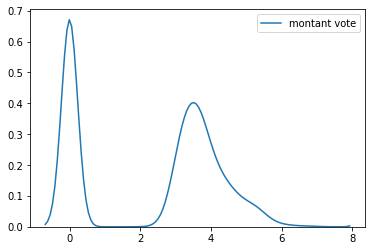

In [18]:
y = df["montant vote"]
logRev = np.log10(np.clip(y, a_min=1, a_max=None))
sns.kdeplot(logRev)

We see that the data is unbalanced, the number of the unsubventioned projects is much higher than the subventioned ones.

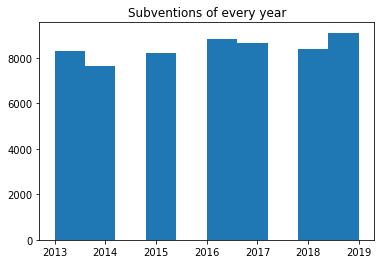

In [19]:
plt.title("Subventions of every year")
plt.hist(df["anneeBudg"])
plt.show()

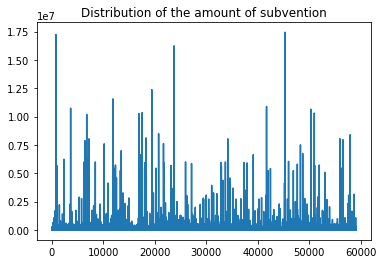

In [20]:
plt.title("Distribution of the amount of subvention")
plt.plot(df["montant vote"])
plt.show()

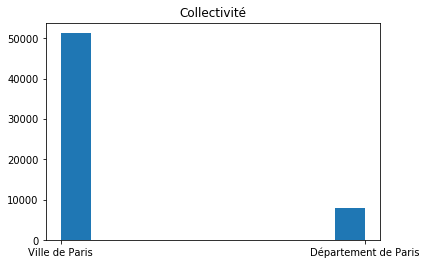

In [21]:
plt.title("Collectivité")
plt.hist(df["collectivite"]) 
plt.show()

To get an idea about the the activities of the associations that benefit from subventions, let's extract the activity areas listed in the dataset and visualize the most popular ones.

In [22]:
secteur_activite = []   #Will contain the activity areas listed in the column "secteur activite"
for i in range(0, len(df),1): 
    secteur_activite.append(df['secteur activite'].iloc[i].split(';')[0])

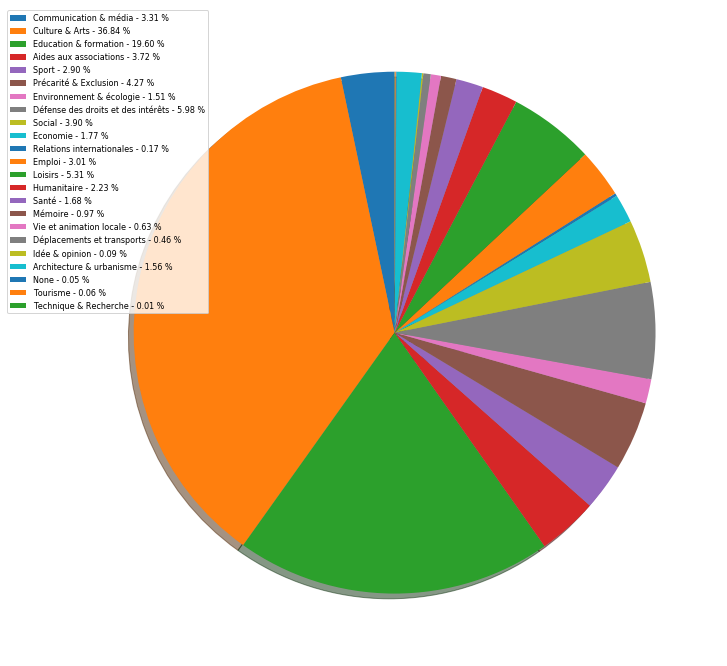

In [23]:
dict_secteur_activite = collections.Counter(secteur_activite)

secteurs = list(dict_secteur_activite.keys())
occurence_secteur = list(dict_secteur_activite.values())

percent = 100/sum(occurence_secteur) * np.array(occurence_secteur)
plt.figure(figsize=(12,12))

patches, texts = plt.pie(occurence_secteur, labels=None,
                  shadow=True, startangle=90)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(secteurs, percent)]

plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

The most popular projects proposed by the associations are in the fields of "Culture and arts" and "Education and formation".



Let's visualize a barplot of the top fist associations that gained subventions the most time.

Text(0.5, 1.0, 'The top first associations that gained subventions the most time ')

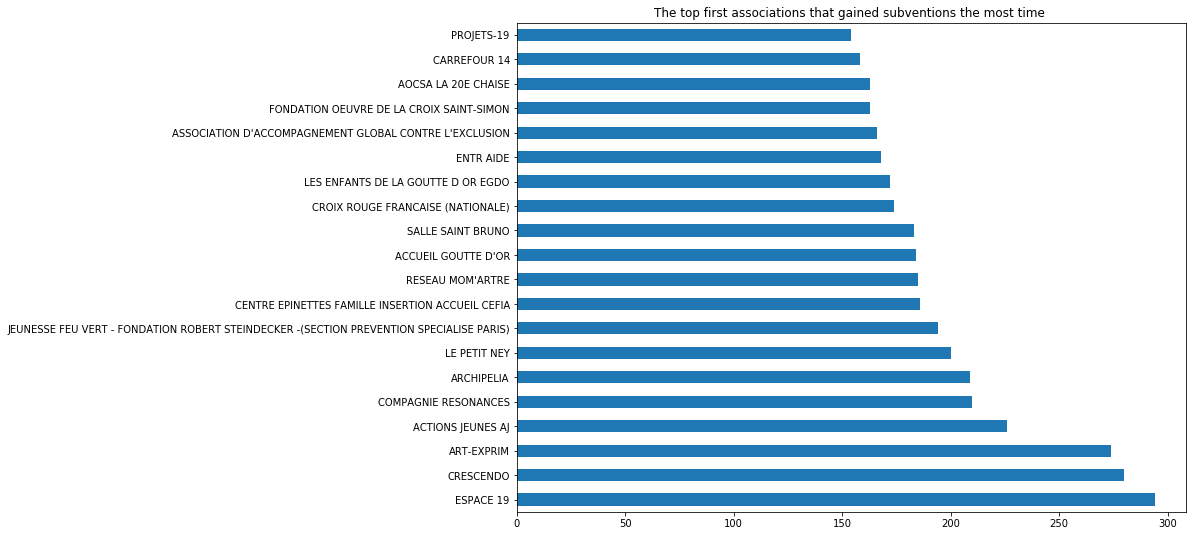

In [24]:
plt.figure(figsize=(12,9))
df['beneficiaire'].value_counts()[:20].plot(kind='barh')
plt.title('The top first associations that gained subventions the most time ')

The top three associations that gained subventions the most time are ESPACE 19, CRESCENDO and AR-EXPRIM. Those associations are likely to gain again subventions.

__Let us now look at the relation of each variable with the target column. We consider categorical variables (with a small number of categories, so that they can be visualized).__

Text(0.5, 1.0, 'Total amount of grants voted by Direction (Main direction of grant)')

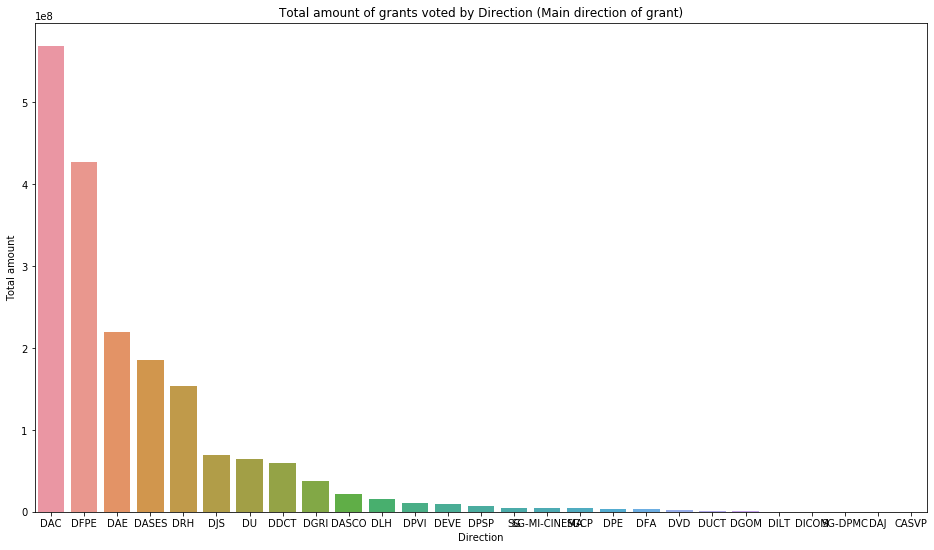

In [25]:
df1 = df[["direction","montant vote"]]
total_montant_by_direction = df1.groupby("direction")['montant vote'].apply(sum)
sorted_montant_by_direction = dict(sorted(dict(total_montant_by_direction).items(),
                                     key=lambda item: item[1], reverse=True))

directions = list(sorted_montant_by_direction.keys())
montants = list(sorted_montant_by_direction.values())

plt.figure(figsize=(16,9))
sns.barplot(x=directions, y=montants, orient='v')
plt.xlabel('Direction')
plt.ylabel('Total amount')
plt.title('Total amount of grants voted by Direction (Main direction of grant)')



As we can see in the next plot, the direction "DAC" has voted the bigger total amount of grants (around 600 million euros) followed by "DFPE" (around 400 million euros).

Text(0.5, 1.0, 'Total amount of grants voted by fiscal year')

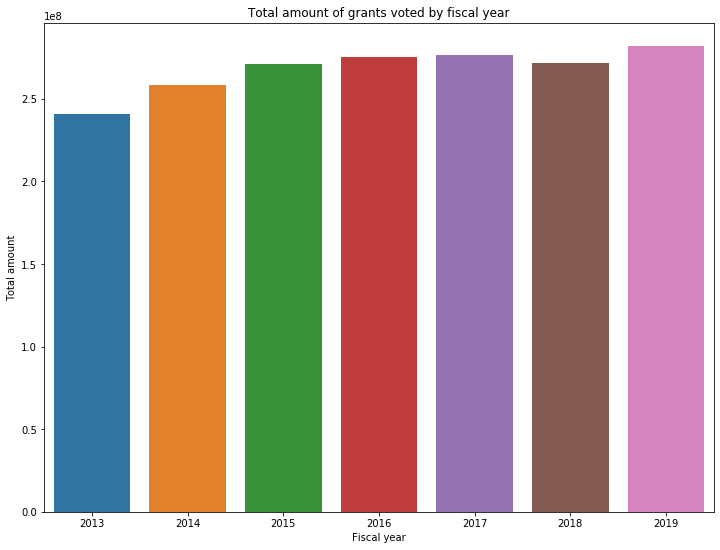

In [26]:
df1 = df[["anneeBudg","montant vote"]]
total_montant_by_annee = df1.groupby("anneeBudg")['montant vote'].apply(sum)
sorted_montant_by_annee = dict(sorted(dict(total_montant_by_annee).items(),
                                     key=lambda item: item[1], reverse=True))

annee = list(sorted_montant_by_annee.keys())
montants = list(sorted_montant_by_annee.values())

plt.figure(figsize=(12,9))
sns.barplot(x=annee, y=montants, orient='v')
plt.xlabel('Fiscal year')
plt.ylabel('Total amount')
plt.title('Total amount of grants voted by fiscal year')

The total amount of grants voted is increasing every year.

Text(0.5, 1.0, 'Total amount of grants voted by subvention nature')

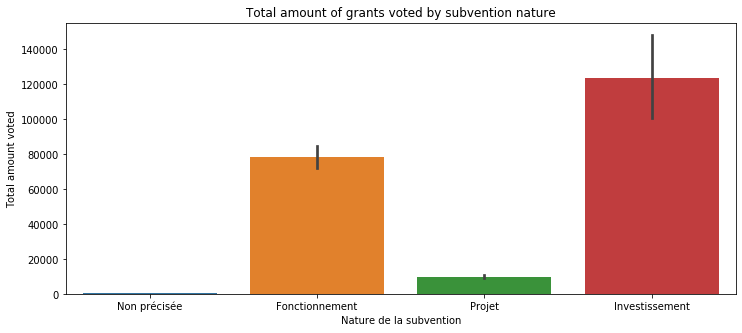

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(x='Nature de la subvention', y='montant vote', data=df, orient='v')
plt.xlabel('Nature de la subvention')
plt.ylabel('Total amount voted')
plt.title('Total amount of grants voted by subvention nature')

We see that subventions requests with no nature or designation are most likely to be rejected. While subventions request to do investissement are the most accepted ones.

let us summary some important patterns that we discovered:
 - The biggest subventions are given in "ville de Paris" and by the directions DAC, DFPE.
 - The amount of subventions is increasing every year and is accoreded mostly to projects of investissement in the sector of "Culture and arts" and "Education and formation". 
 - The subvention vary a lot and might be zero, low or very high amount.  

In [28]:
for c in df.columns: 
    df[c] = df[c].astype("category")  
    df[c].fillna(df[c].mode(),inplace=True)
    df[c] = df[c].cat.codes.values
  

In [29]:
#data after encoding 
df.head()

,numDoc,anneeBudg,collectivite,beneficiaire,siret,objet du dossier,montant vote,direction,Nature de la subvention,secteur activite
0,39917,4,1,6957,2341,14467,0,1,2,145
1,36384,4,1,6957,2341,35435,1213,1,0,145
2,34037,4,1,6962,6071,11689,478,6,3,190
3,34482,4,1,7049,3161,35324,0,1,2,209
4,35784,4,1,7063,4749,13474,208,1,3,209


# General Idea of the model and metric

The main idea of the model is to predict whether the organisation will get subvention and if yes how much.
So the problem will basically be a classification problem with a class for the organization who did not get any subvention and other classes for the amount of the subvention.
To understand better the idea,we suggest this distribution of classes that represent well the data 

<BarContainer object of 6 artists>

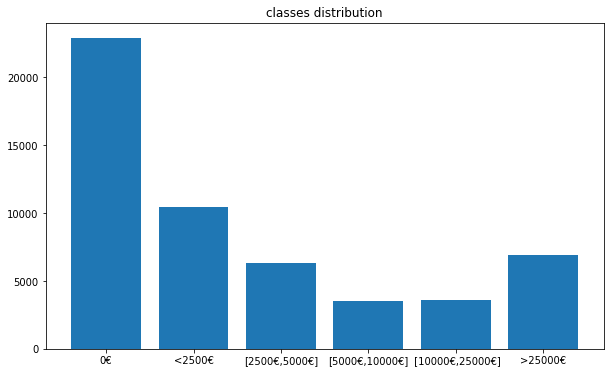

In [30]:
clusters_lengths = list()
clusters_limits = [1,2500,5000,10000,25000,y.max()+1]
y_new = list()
clusters_lengths.append(len(y[y==0]))
for i in range(len(clusters_limits)-1) : 
    a,b = clusters_limits[i],clusters_limits[i+1]
    mask1 = y >a
    mask2 = y< b
    mask = mask1 & mask2
    clusters_lengths.append(len(y[mask]))

for k in y :
    if k==0: 
        y_new.append(0)
    else :
        for i in range(len(clusters_limits)-1) : 
            a,b = clusters_limits[i],clusters_limits[i+1] 
            if (k >=a and k<b) : 
                y_new.append(i+1)

class_names=["0€","<2500€","[2500€,5000€]","[5000€,10000€]"," [10000€,25000€]",">25000€"]   
plt.figure(figsize=(10,6))
plt.title("classes distribution")
plt.bar(class_names,clusters_lengths)

We can see that there is a class imbalance.A solution for this imbalance would be by choosing the best class weights for this problem.We could tune this weights by most of the classifiers offered by sklearn.Example: using RandomForestClassifier
We are going to priorize the model to make less errors when prediction the class 0 euro with the following code: 

In [31]:
n = len(clusters_lengths)
coeff_0_class = 0.8
class_weights = {}
class_weights[0]=coeff_0_class
for i in range(n-1):
    class_weights[i+1]=(1-coeff_0_class)/(n-1)
clf = RandomForestClassifier(n_estimators=256,class_weight=class_weights)

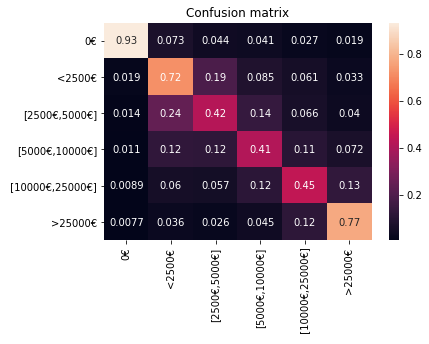

In [34]:
X = df.drop(["montant vote","numDoc"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y_new,test_size=0.33) 
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
CM = confusion_matrix(y_test,y_pred)
CM = CM /CM.astype(np.float).sum(axis=1)
df_cm = pd.DataFrame(CM, index = class_names,
                  columns = class_names)
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True)

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() # 

The model is well predicting the priorized class (class 0) with 0.93 accuracy 

## The Metric

### The classification metric

Since we have binary classification ,the F1 score is widely used to evaluate the performance of classification problems and it works as follows: 
(https://en.wikipedia.org/wiki/F1_score) 

${\displaystyle F_{1}=\left({\frac {2}{\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}}\right)=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}}$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png" >

In [35]:
def classification_metric(y_pred, y_test):
    return f1_score(y_pred, y_test, average="weighted")

### Regression metric 

For the Regression metric we will use the MAE which is the average of the absolute ,the choice of MAE over RMSE is that the MAE is more robust to outliers.In fact , minimizing RMSE over a set of numbers results in finding its mean while minimizing MAE over the same set results in finding the median that's why MAE is more robust.Moreover, we added a parameter tol which stands for tolerance which will enable us to tolerate predictions which are close to the real value. Since we want to have a normalized metric we can the use the version "symmetric" mean absolute percentage error  which is:
$$\frac{1}{n}\sum_{i=1}^n{\left|\frac{f_i-y_i}{(f_i+y_i)/2}\right|}$$ 
with $f_i$ are the predicted values.


In [46]:
def regression_metric(y_pred, y_test, tol=500):
    n = y_pred.shape[0]
    diff = np.abs(y_pred, y_test)
    sum_vec = np.abs(y_pred + y_test)
    mask = diff < tol
    diff[mask] = 0
    diff[~mask] = diff
    return (1/n) * np.sum(diff/(0.5 *sum_vec))


## Model Metric

For the model metric since our model is doing both regression and classification ,the model metric will average the scores of regression and classification but with weights that we choose accodingly to what we want to emphasize more the regression or the classification as follows: 

$$params = y_{pred\_reg}, y_{test\_reg}, y_{pred\_class}, y_{test\_class}, \alpha_{class}, \alpha_{reg}, tol$$
$$metric_{Model}(params)= \alpha_{class} metric_{classification} (y_{pred\_class}, y_{test\_class})  + \alpha_{reg} metric_{regression}(y_{pred\_reg}, y_{test\_reg},tol)  $$

In [47]:
def metric_model(y_pred_reg, y_test_reg, y_pred_class, y_test_class, alpha_class=0.5, alpha_reg=0.5, tol=500):
    reg_score = regression_metric(y_pred_reg, y_test_reg, tol=tol)
    class_score = classification_metric(y_pred_class, y_test_class)
    return alpha_class * class_score + alpha_reg*reg_score

In [48]:
#Testing the metric 
alpha_class=alpha_reg = 0.5
tol  = 500 
 
y_pred_reg = np.array([1233,5000,7235,25050 , 300000]  )
y_test_reg = np.array([1600,7000,5000,10000 , 20000]  )
y_pred_class = np.array([1,0,1,0,0,0,1])
y_test_class =np.array([0,0,1,0,1,0,1] )
score = metric_model(y_pred_reg, y_test_reg, y_pred_class, y_test_class, alpha_class=0.5, alpha_reg=0.5, tol=500) 
print("The score of the test example is " + str(score ))



The score of the test example is 0.8571428571428572


# Model

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [86]:
X = df.drop(["montant vote","numDoc"],axis=1)

In [87]:
X.head()

,anneeBudg,collectivite,beneficiaire,siret,objet du dossier,direction,Nature de la subvention,secteur activite
0,4,1,6957,2341,14467,1,2,145
1,4,1,6957,2341,35435,1,0,145
2,4,1,6962,6071,11689,6,3,190
3,4,1,7049,3161,35324,1,2,209
4,4,1,7063,4749,13474,1,3,209


In [88]:
clf = RandomForestRegressor(n_estimators=64 ) 
#clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=128),n_estimators=64, random_state=np.random.RandomState(1))


In [89]:
# predict montant voté
scores = cross_val_score(clf,X, y, cv=5)
scores

array([0.70841632, 0.6041573 , 0.68470149, 0.77257346, 0.54452561])

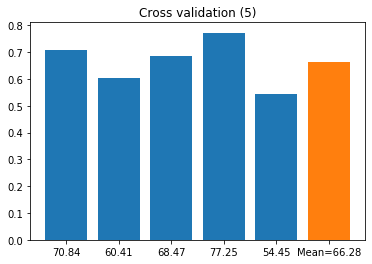

In [90]:
plt.title("Cross validation (5)")
plt.bar([str(i*100)[:5] for i in scores] ,scores)
plt.bar("Mean="+ str(np.mean(scores)*100)[:5],np.mean(scores))
plt.show()

In [91]:
np.mean(scores)

0.6628748380183651

# Viz model

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33) 
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

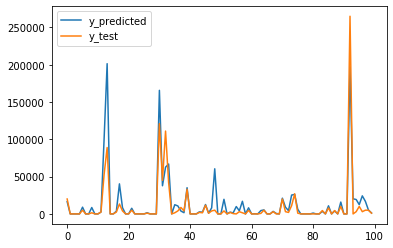

In [93]:
dist = 100
plt.plot(range(dist),y_pred[:dist],label = "y_predicted")
plt.plot(range(dist),y_test[:dist],label ="y_test")
plt.legend()
plt.show()